# Text Preprocessing and Visualization for Wikimedia

* 1. Text Preprocessing
* 2. Text Visualization

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from nltk.corpus import stopwords

from textblob import Word, TextBlob
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import os
import certifi
from nltk.corpus import stopwords

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Text Preprocessing

In [2]:
df = pd.read_csv("wiki_data.csv", sep=",")
df = df.iloc[:,1:]
df_copy = df.copy()
df.head()

,text
0,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,Battery indicator\n\nA battery indicator (also...
2,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,CAVNET\n\nCAVNET was a secure military forum w...
4,CLidar\n\nThe CLidar is a scientific instrumen...


In [3]:
df['text'] = df['text'].str.extract(r'\n\n(.*)')
df

,text
0,Anovo (formerly A Novo) is a computer services...
1,A battery indicator (also known as a battery g...
2,"Robert Allen Pease (August 22, 1940Â â€“ June ..."
3,CAVNET was a secure military forum which becam...
4,The CLidar is a scientific instrument used for...
...,...
10854,Soundcast LLC is a privately funded company th...
10855,A spectrum analyzer measures the magnitude of ...
10856,Telepresence technology is a term used by the ...
10857,The Trans-Pacific Profiler Network (usually ab...


In [4]:
def clean_text(df):
    df = df.str.lower()
    df = df.str.replace('[^\w\s]', '')
    df = df.str.replace('â', '')
    df = df.str.replace('€', '')
    df = df.str.replace(',', '')
    df = df.str.replace('.', '')
    df = df.str.replace("'", '')
    df = df.str.replace('"', '')
    df = df.str.replace('`', '')
    df = df.str.replace('(', '')
    df = df.str.replace(')', '')
    df = df.replace('\d', '', regex=True)
    return df

In [5]:
df['text'] = clean_text(df['text'])
df['text']

0        anovo formerly a novo is a computer services c...
1        a battery indicator also known as a battery ga...
2        robert allen pease august   “ june   was an an...
3        cavnet was a secure military forum which becam...
4        the clidar is a scientific instrument used for...
                               ...                        
10854    soundcast llc is a privately funded company th...
10855    a spectrum analyzer measures the magnitude of ...
10856    telepresence technology is a term used by the ...
10857    the trans-pacific profiler network usually abb...
10858    a transfer case is a part of the drivetrain of...
Name: text, Length: 10859, dtype: object

In [6]:
os.environ["SSL_CERT_FILE"] = certifi.where()
nltk.download('stopwords')


def storwords_text(df):
    sw = stopwords.words('english')
    df = df.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['text'] = storwords_text(df['text'])
df['text']

0        anovo formerly novo computer services company ...
1        battery indicator also known battery gauge dev...
2        robert allen pease august “ june analog integr...
3        cavnet secure military forum became operationa...
4        clidar scientific instrument used measuring pa...
                               ...                        
10854    soundcast llc privately funded company creates...
10855    spectrum analyzer measures magnitude input sig...
10856    telepresence technology term used national oce...
10857    trans-pacific profiler network usually abbrevi...
10858    transfer case part drivetrain four-wheel-drive...
Name: text, Length: 10859, dtype: object

In [8]:
def rarewords_text(df):
    temp_df = pd.Series(' '.join(df).split()).value_counts()
    drops = temp_df[(temp_df <= 1)]
    df = df.apply(lambda x: " ".join(x for x in x.split() if x not in drops))
    return df

In [9]:
df['text'] = rarewords_text(df['text'])
df['text']

0        formerly novo computer services company based ...
1        battery indicator also known battery gauge dev...
2        robert allen pease august “ june analog integr...
3        secure military forum became operational april...
4        clidar scientific instrument used measuring pa...
                               ...                        
10854    llc privately funded company creates wireless ...
10855    spectrum analyzer measures magnitude input sig...
10856    telepresence technology term used national oce...
10857    profiler network usually abbreviated system wi...
10858    transfer case part drivetrain multiple powered...
Name: text, Length: 10859, dtype: object

In [10]:
nltk.download("punkt")

df["text"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [formerly, novo, computer, services, company, ...
1    [battery, indicator, also, known, battery, gau...
2    [robert, allen, pease, august, “, june, analog...
3    [secure, military, forum, became, operational,...
4    [clidar, scientific, instrument, used, measuri...
Name: text, dtype: object

In [11]:
nltk.download('wordnet')

# Assuming df is your DataFrame
lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
#stemming ile aynı işlem olacaktır
df['text']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        formerly novo computer service company based f...
1        battery indicator also known battery gauge dev...
2        robert allen pea august “ june analog integrat...
3        secure military forum became operational april...
4        clidar scientific instrument used measuring pa...
                               ...                        
10854    llc privately funded company creates wireless ...
10855    spectrum analyzer measure magnitude input sign...
10856    telepresence technology term used national oce...
10857    profiler network usually abbreviated system wi...
10858    transfer case part drivetrain multiple powered...
Name: text, Length: 10859, dtype: object

## 2. Text Visualization

In [12]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.sort_values("tf", ascending=False)

,words,tf
76,used,3331.00
307,system,2939.00
4,company,2048.00
110,technology,1934.00
29,also,1926.00
...,...,...
12613,techvibes,2.00
12611,exoskeleton,2.00
12598,multibeam,2.00
12597,moneygram,2.00


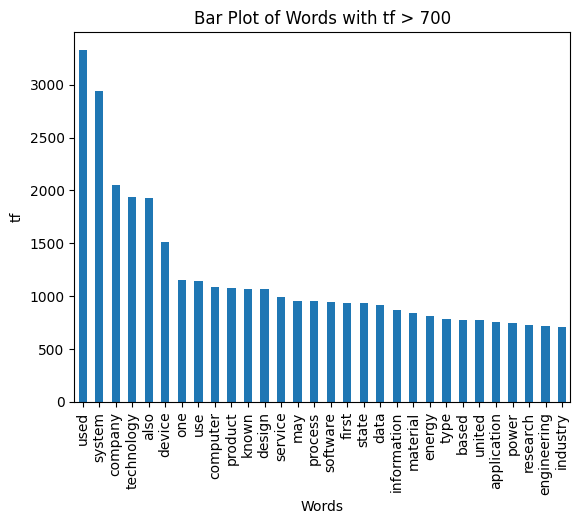

In [13]:
# Sort the DataFrame by the "tf" column
tf_sorted = tf[tf["tf"] > 700].sort_values(by="tf", ascending=False)

# Plot the bar chart
tf_sorted.plot.bar(x="words", y="tf", legend=False)
plt.xlabel("Words")
plt.ylabel("tf")
plt.title("Bar Plot of Words with tf > 700")
plt.show()

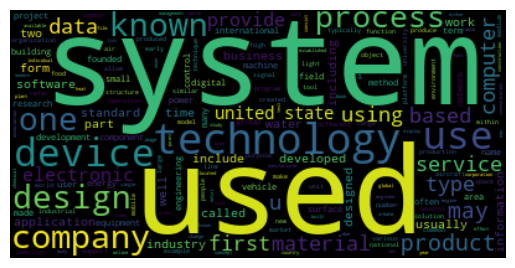

In [14]:
text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

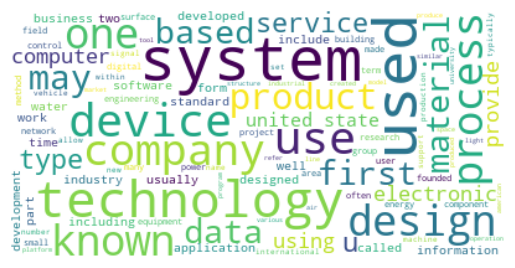

In [15]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")#kaydetmek için